<a href="https://colab.research.google.com/github/Beatriz-Maria/disciplina_prog/blob/main/Lista_Exercicios_1_resolu%C3%A7%C3%A3oipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercício 1 - No começo era tudo uma grande massa sem vida
Lista de exercícios primeiro tópico

###Instale a biblioteca Biopython, importe para o seu programa a biblioteca *Biopython*, a biblioteca *pylab*  e os objetos *Seq, SeqIO* e *GC* da biblioteca *Biopython*.

In [1]:
!pip3 install biopython
import Bio
import pylab
from Bio.Seq import Seq
from Bio.SeqUtils import GC
from Bio import SeqIO

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.3 MB 5.0 MB/s 


###Faça o download do site do GenBank (NCBI - https://www.ncbi.nlm.nih.gov) do genoma Bacteriophage lambda (NC 001416), caso seja a versão compactada descompacte-a nesta sequência de comandos.

In [2]:
!wget https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/840/245/GCF_000840245.1_ViralProj14204/GCF_000840245.1_ViralProj14204_genomic.fna.gz
!gunzip GCF_000840245.1_ViralProj14204_genomic.fna.gz

--2022-07-08 02:49:59--  https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/840/245/GCF_000840245.1_ViralProj14204/GCF_000840245.1_ViralProj14204_genomic.fna.gz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.11, 130.14.250.12, 2607:f220:41f:250::229, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15299 (15K) [application/x-gzip]
Saving to: ‘GCF_000840245.1_ViralProj14204_genomic.fna.gz’

GCF_000840245.1_Vir 100%[===================>]  14.94K  --.-KB/s    in 0.01s   

2022-07-08 02:49:59 (1.11 MB/s) - ‘GCF_000840245.1_ViralProj14204_genomic.fna.gz’ saved [15299/15299]



In [3]:
!cp /content/GCF_000840245.1_ViralProj14204_genomic.fna /content/GCF_000840245.1_ViralProj14204_genomic.fasta
arquivo = "/content/GCF_000840245.1_ViralProj14204_genomic.fasta"

###Carregue o genoma baixado utilizando o objeto *SeqIO*. Crie um objeto do tipo *Seq* que tenha o reverso (3'--5') do genoma lido.   

In [4]:
for rec in SeqIO.parse(arquivo, "fasta"):
  print(rec.description)
  my_seq = Seq(rec.seq)
print('A sequência do genoma do organismo é: ', my_seq)
my_seq_reverse = (my_seq[::-1])
print('A sequência reversa do genoma do organismo é: ', my_seq_reverse)

NC_001416.1 Enterobacteria phage lambda, complete genome
A sequência do genoma do organismo é:  GGGCGGCGACCTCGCGGGTTTTCGCTATTTATGAAAATTTTCCGGTTTAAGGCGTTTCCGTTCTTCTTCGTCATAACTTAATGTTTTTATTTAAAATACCCTCTGAAAAGAAAGGAAACGACAGGTGCTGAAAGCGAGGCTTTTTGGCCTCTGTCGTTTCCTTTCTCTGTTTTTGTCCGTGGAATGAACAATGGAAGTCAACAAAAAGCAGCTGGCTGACATTTTCGGTGCGAGTATCCGTACCATTCAGAACTGGCAGGAACAGGGAATGCCCGTTCTGCGAGGCGGTGGCAAGGGTAATGAGGTGCTTTATGACTCTGCCGCCGTCATAAAATGGTATGCCGAAAGGGATGCTGAAATTGAGAACGAAAAGCTGCGCCGGGAGGTTGAAGAACTGCGGCAGGCCAGCGAGGCAGATCTCCAGCCAGGAACTATTGAGTACGAACGCCATCGACTTACGCGTGCGCAGGCCGACGCACAGGAACTGAAGAATGCCAGAGACTCCGCTGAAGTGGTGGAAACCGCATTCTGTACTTTCGTGCTGTCGCGGATCGCAGGTGAAATTGCCAGTATTCTCGACGGGCTCCCCCTGTCGGTGCAGCGGCGTTTTCCGGAACTGGAAAACCGACATGTTGATTTCCTGAAACGGGATATCATCAAAGCCATGAACAAAGCAGCCGCGCTGGATGAACTGATACCGGGGTTGCTGAGTGAATATATCGAACAGTCAGGTTAACAGGCTGCGGCATTTTGTCCGCGCCGGGCTTCGCTCACTGTTCAGGCCGGAGCCACAGACCGCCGTTGAATGGGCGGATGCTAATTACTATCTCCCGAAAGAATCCGCATACCAGGAAGGGCGCTGGGAAACACTGCCCTTTCAGCGGGCCATCATGAATGCGATGGG

###Calcule e imprima as estatísticas dos GCs para o genoma lido e monte o gráfico com as curvas dos valores ordenados e na sequência.

In [5]:
gc_value = []
for record in SeqIO.parse(arquivo, "fasta"):
  gc_value.append(GC(record.seq))
print(gc_value)

[49.85773782524432]


In [6]:
gc = GC(my_seq)
gc

49.85773782524432

### Faça a estatística das bases (A,C T, G) de todo o genoma NC 001416 dividido em 9.000 e 20.000 pbs e armazene os valores em duas listas distintas.

In [7]:
count_A = []
count_C = []
count_T = []
count_G = []
init = 0
a = int(len(record.seq)/9000)
for i in range(a):
  end = (int(((i+1)*(int(len(my_seq))/a)) -1))
  count_A.append(my_seq[init:end].count('A'))
  count_C.append(my_seq[init:end].count('C'))
  count_T.append(my_seq[init:end].count('T'))
  count_G.append(my_seq[init:end].count('G'))   
  init = end + 1

print('Contagem com divisão em 9000pbs')
print("Count_A: ", count_A)
print("Count_C: ", count_C)
print("Count_T: ", count_T)
print("Count_G: ", count_G)

Contagem com divisão em 9000pbs
Count_A:  [2209, 2184, 2651, 2489, 2801]
Count_C:  [2502, 2407, 2061, 2263, 2128]
Count_T:  [2007, 1948, 2870, 2845, 2316]
Count_G:  [2981, 3160, 2118, 2102, 2455]


In [8]:
count_A2 = []
count_C2 = []
count_T2 = []
count_G2 = []
init = 0
b = int(len(record.seq)/20000)
for i in range(b):
  end = (int(((i+1)*(int(len(my_seq))/b)) -1))
  count_A2.append(my_seq[init:end].count('A'))
  count_C2.append(my_seq[init:end].count('C'))
  count_T2.append(my_seq[init:end].count('T'))
  count_G2.append(my_seq[init:end].count('G'))   
  init = end + 1

print('Contagem com divisão em 20000pbs')
print("Count_A: ", count_A2)
print("Count_C: ", count_C2)
print("Count_T: ", count_T2)
print("Count_G: ", count_G2)

Contagem com divisão em 20000pbs
Count_A:  [5708, 6626]
Count_C:  [5954, 5408]
Count_T:  [5232, 6753]
Count_G:  [7356, 5463]


###Monte dois gráficos com as ocorrências das bases (A, C, T, G), o primeiro com a divisão de 9.000 pbs e o segundo com 20.000 pbs. 

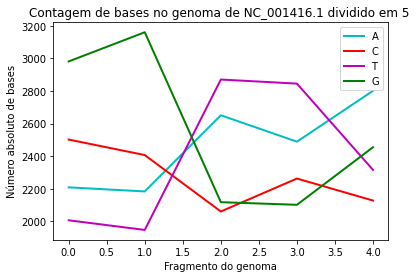

In [9]:
pylab.plot(count_A, 'c',label = 'A', linestyle = 'solid', linewidth = (2))
pylab.plot(count_C, 'r' , label = 'C', linestyle = 'solid', linewidth = 2)
pylab.plot(count_T, 'm', label = 'T', linestyle = 'solid', linewidth = 2)
pylab.plot(count_G, 'g', label = 'G', linestyle = 'solid', linewidth = 2)
pylab.grid(False)
pylab.legend(loc='upper right')
#pylab.xlim(-1, 5, 1)
pylab.title('Contagem de bases no genoma de %s dividido em %s ' % (rec.id, a))
pylab.legend()
pylab.ylabel("Número absoluto de bases")
pylab.xlabel("Fragmento do genoma")
pylab.show()

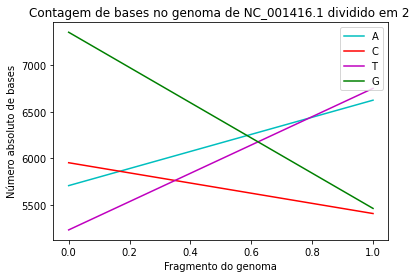

In [10]:
pylab.plot(count_A2, 'c' , label = 'A')
pylab.plot(count_C2, 'r' ,label = 'C')
pylab.plot(count_T2, 'm' ,label = 'T')
pylab.plot(count_G2, 'g' ,label = 'G')
pylab.title('Contagem de bases no genoma de %s dividido em %s ' % (rec.id, b))
pylab.legend()
pylab.legend(loc='upper right')
pylab.ylabel("Número absoluto de bases")
pylab.xlabel("Fragmento do genoma")
pylab.show()

###Monte uma lista com os triplets.

In [11]:
temp = []
my_seq_list = ['A','T','C','G']
for x in range (2):
  for base in my_seq_list:
    temp.append(base+'A')
    temp.append(base+'C')
    temp.append(base+'T')
    temp.append(base+'G')
  my_seq_list = temp
  temp = []
print(my_seq_list)

['AAA', 'AAC', 'AAT', 'AAG', 'ACA', 'ACC', 'ACT', 'ACG', 'ATA', 'ATC', 'ATT', 'ATG', 'AGA', 'AGC', 'AGT', 'AGG', 'TAA', 'TAC', 'TAT', 'TAG', 'TCA', 'TCC', 'TCT', 'TCG', 'TTA', 'TTC', 'TTT', 'TTG', 'TGA', 'TGC', 'TGT', 'TGG', 'CAA', 'CAC', 'CAT', 'CAG', 'CCA', 'CCC', 'CCT', 'CCG', 'CTA', 'CTC', 'CTT', 'CTG', 'CGA', 'CGC', 'CGT', 'CGG', 'GAA', 'GAC', 'GAT', 'GAG', 'GCA', 'GCC', 'GCT', 'GCG', 'GTA', 'GTC', 'GTT', 'GTG', 'GGA', 'GGC', 'GGT', 'GGG']


In [12]:
 print('Geração de uma lista com os triplets --> cada um gera um aminoácido, sendo 64 combinações possíveis')
 print(my_seq_list)


Geração de uma lista com os triplets --> cada um gera um aminoácido, sendo 64 combinações possíveis
['AAA', 'AAC', 'AAT', 'AAG', 'ACA', 'ACC', 'ACT', 'ACG', 'ATA', 'ATC', 'ATT', 'ATG', 'AGA', 'AGC', 'AGT', 'AGG', 'TAA', 'TAC', 'TAT', 'TAG', 'TCA', 'TCC', 'TCT', 'TCG', 'TTA', 'TTC', 'TTT', 'TTG', 'TGA', 'TGC', 'TGT', 'TGG', 'CAA', 'CAC', 'CAT', 'CAG', 'CCA', 'CCC', 'CCT', 'CCG', 'CTA', 'CTC', 'CTT', 'CTG', 'CGA', 'CGC', 'CGT', 'CGG', 'GAA', 'GAC', 'GAT', 'GAG', 'GCA', 'GCC', 'GCT', 'GCG', 'GTA', 'GTC', 'GTT', 'GTG', 'GGA', 'GGC', 'GGT', 'GGG']


###Faça a estatísticas de ocorrência dos triplets no genoma NC 001416 e guarde em uma lista.

In [13]:
# contando todos os triplets sem considerar a posição

count_aux = 0
count_trip = []
for trip in my_seq_list:
  count_aux = my_seq.count(trip)
  count_trip.append(trip + ':'+
  str(count_aux))
print(count_trip)

['AAA:857', 'AAC:852', 'AAT:838', 'AAG:747', 'ACA:637', 'ACC:679', 'ACT:505', 'ACG:720', 'ATA:638', 'ATC:774', 'ATT:892', 'ATG:999', 'AGA:652', 'AGC:795', 'AGT:594', 'AGG:657', 'TAA:691', 'TAC:483', 'TAT:742', 'TAG:215', 'TCA:856', 'TCC:590', 'TCT:608', 'TCG:581', 'TTA:672', 'TTC:842', 'TTT:756', 'TTG:734', 'TGA:1091', 'TGC:1057', 'TGT:683', 'TGG:935', 'CAA:698', 'CAC:553', 'CAT:803', 'CAG:1132', 'CCA:675', 'CCC:348', 'CCT:525', 'CCG:884', 'CTA:286', 'CTC:451', 'CTT:602', 'CTG:1170', 'CGA:629', 'CGC:767', 'CGT:718', 'CGG:963', 'GAA:1048', 'GAC:655', 'GAT:915', 'GAG:607', 'GCA:1016', 'GCC:815', 'GCT:856', 'GCG:882', 'GTA:540', 'GTC:583', 'GTT:754', 'GTG:846', 'GGA:850', 'GGC:961', 'GGT:745', 'GGG:473']


In [14]:
# contando todos os triplets considerando a posição

codons = (my_seq[n:n+3] for n in range(0,len(my_seq),3))
generator_codons_list = (list(codons))

dict_codons = {}

for codon in generator_codons_list:
    if codon in dict_codons:
        dict_codons[codon] += 1
    else:
        dict_codons[codon] = 1

print(dict_codons)


{Seq('GGG'): 210, Seq('CGG'): 330, Seq('CGA'): 218, Seq('CCT'): 177, Seq('CGC'): 288, Seq('TTT'): 369, Seq('TCG'): 202, Seq('CTA'): 101, Seq('ATG'): 341, Seq('AAA'): 395, Seq('ATT'): 304, Seq('TTC'): 291, Seq('AAG'): 277, Seq('GCG'): 263, Seq('CCG'): 306, Seq('GTC'): 182, Seq('ATA'): 242, Seq('ACT'): 164, Seq('TAA'): 219, Seq('TGT'): 260, Seq('TAT'): 241, Seq('TTA'): 256, Seq('TAC'): 155, Seq('CTG'): 382, Seq('AGA'): 226, Seq('GAA'): 308, Seq('ACG'): 232, Seq('ACA'): 227, Seq('GGT'): 263, Seq('GCT'): 270, Seq('AGC'): 290, Seq('GAG'): 209, Seq('TGG'): 335, Seq('TCT'): 219, Seq('GTT'): 198, Seq('CGT'): 236, Seq('GGA'): 287, Seq('AAC'): 297, Seq('AAT'): 297, Seq('AGT'): 225, Seq('CAA'): 216, Seq('GCA'): 296, Seq('GGC'): 325, Seq('TGA'): 346, Seq('CAT'): 248, Seq('TGC'): 355, Seq('TCA'): 294, Seq('GCC'): 254, Seq('AGG'): 236, Seq('CTC'): 154, Seq('GTA'): 162, Seq('CAG'): 399, Seq('CCA'): 243, Seq('GAT'): 292, Seq('CCC'): 146, Seq('TCC'): 186, Seq('ACC'): 248, Seq('TTG'): 263, Seq('CAC'): 1

In [15]:
#retirando o último elemento

del dict_codons['G']
print(dict_codons)

{Seq('GGG'): 210, Seq('CGG'): 330, Seq('CGA'): 218, Seq('CCT'): 177, Seq('CGC'): 288, Seq('TTT'): 369, Seq('TCG'): 202, Seq('CTA'): 101, Seq('ATG'): 341, Seq('AAA'): 395, Seq('ATT'): 304, Seq('TTC'): 291, Seq('AAG'): 277, Seq('GCG'): 263, Seq('CCG'): 306, Seq('GTC'): 182, Seq('ATA'): 242, Seq('ACT'): 164, Seq('TAA'): 219, Seq('TGT'): 260, Seq('TAT'): 241, Seq('TTA'): 256, Seq('TAC'): 155, Seq('CTG'): 382, Seq('AGA'): 226, Seq('GAA'): 308, Seq('ACG'): 232, Seq('ACA'): 227, Seq('GGT'): 263, Seq('GCT'): 270, Seq('AGC'): 290, Seq('GAG'): 209, Seq('TGG'): 335, Seq('TCT'): 219, Seq('GTT'): 198, Seq('CGT'): 236, Seq('GGA'): 287, Seq('AAC'): 297, Seq('AAT'): 297, Seq('AGT'): 225, Seq('CAA'): 216, Seq('GCA'): 296, Seq('GGC'): 325, Seq('TGA'): 346, Seq('CAT'): 248, Seq('TGC'): 355, Seq('TCA'): 294, Seq('GCC'): 254, Seq('AGG'): 236, Seq('CTC'): 154, Seq('GTA'): 162, Seq('CAG'): 399, Seq('CCA'): 243, Seq('GAT'): 292, Seq('CCC'): 146, Seq('TCC'): 186, Seq('ACC'): 248, Seq('TTG'): 263, Seq('CAC'): 1

In [16]:
# organizando o dicionário por ordem alfabética de códons

dict_codons_sorted = sorted(dict_codons.keys())
print(dict_codons_sorted)

[Seq('AAA'), Seq('AAC'), Seq('AAG'), Seq('AAT'), Seq('ACA'), Seq('ACC'), Seq('ACG'), Seq('ACT'), Seq('AGA'), Seq('AGC'), Seq('AGG'), Seq('AGT'), Seq('ATA'), Seq('ATC'), Seq('ATG'), Seq('ATT'), Seq('CAA'), Seq('CAC'), Seq('CAG'), Seq('CAT'), Seq('CCA'), Seq('CCC'), Seq('CCG'), Seq('CCT'), Seq('CGA'), Seq('CGC'), Seq('CGG'), Seq('CGT'), Seq('CTA'), Seq('CTC'), Seq('CTG'), Seq('CTT'), Seq('GAA'), Seq('GAC'), Seq('GAG'), Seq('GAT'), Seq('GCA'), Seq('GCC'), Seq('GCG'), Seq('GCT'), Seq('GGA'), Seq('GGC'), Seq('GGG'), Seq('GGT'), Seq('GTA'), Seq('GTC'), Seq('GTG'), Seq('GTT'), Seq('TAA'), Seq('TAC'), Seq('TAG'), Seq('TAT'), Seq('TCA'), Seq('TCC'), Seq('TCG'), Seq('TCT'), Seq('TGA'), Seq('TGC'), Seq('TGG'), Seq('TGT'), Seq('TTA'), Seq('TTC'), Seq('TTG'), Seq('TTT')]


In [17]:
for chave in sorted(dict_codons.keys()):
  chave_sorted_count = (print(f'{dict_codons[chave]}'))

395
297
277
297
227
248
232
164
226
290
236
225
242
257
341
304
216
182
399
248
243
146
306
177
218
288
330
236
101
154
382
178
308
221
209
292
296
254
263
270
287
325
210
263
162
182
290
198
219
155
84
241
294
186
202
219
346
355
335
260
256
291
263
369


In [18]:
chave_sorted_count = (395, 297, 277, 297, 227, 248, 232, 164, 226, 290, 236, 225, 242, 257, 341, 304, 216, 182, 399, 248, 243, 146, 306, 177, 218, 288, 330, 236, 101, 154, 382, 178, 308, 221, 209, 292, 296, 254, 263, 270, 287, 325, 210, 263, 162, 182, 290, 198, 219, 155, 84, 241, 294, 186, 202, 219, 346, 355, 335, 260, 256, 291, 236, 369)
print(chave_sorted_count)

(395, 297, 277, 297, 227, 248, 232, 164, 226, 290, 236, 225, 242, 257, 341, 304, 216, 182, 399, 248, 243, 146, 306, 177, 218, 288, 330, 236, 101, 154, 382, 178, 308, 221, 209, 292, 296, 254, 263, 270, 287, 325, 210, 263, 162, 182, 290, 198, 219, 155, 84, 241, 294, 186, 202, 219, 346, 355, 335, 260, 256, 291, 236, 369)


###Monte um histograma das ocorrências dos triplets.

**DICA:** utilize a função pylab.hist no lugar da pylab.plot. Utilize os valores dentro da lista.

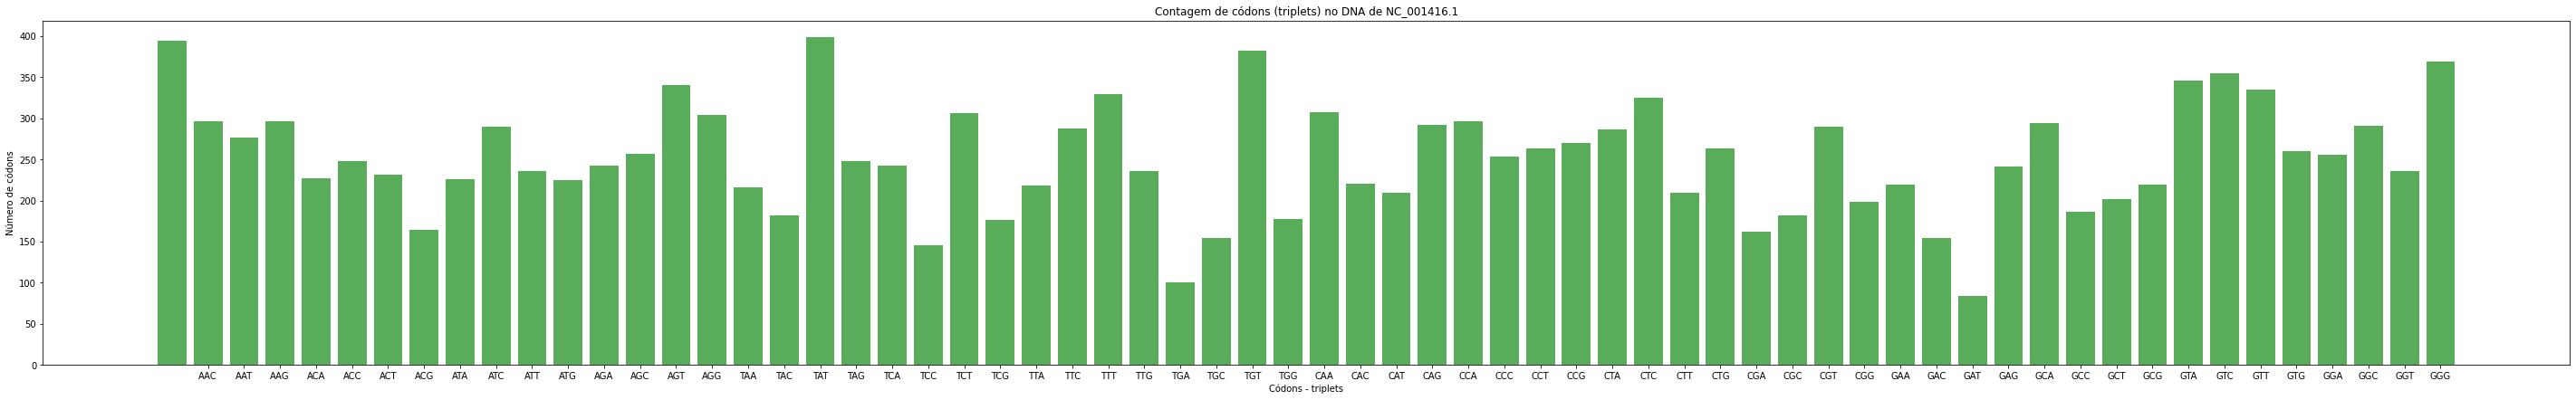

In [20]:
pylab.bar(my_seq_list, chave_sorted_count, color = 'g', alpha = 0.65 )
pylab.title('Contagem de códons (triplets) no DNA de %s' %rec.id)
pylab.xlabel('Códons - triplets')
pylab.ylabel('Número de códons')
pylab.rcParams['figure.figsize'] = (50,70)
pylab.xticks(range(1,64))
pylab.show()